In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [3]:
print("XOR Dataset:")
print("-" * 30)
for i in range(len(X)):
    print(f"Input: {X[i]} → Output: {y[i][0]}")

XOR Dataset:
------------------------------
Input: [0 0] → Output: 0
Input: [0 1] → Output: 1
Input: [1 0] → Output: 1
Input: [1 1] → Output: 0


- problem of linearity
- a single strainght line can't seperate this xor

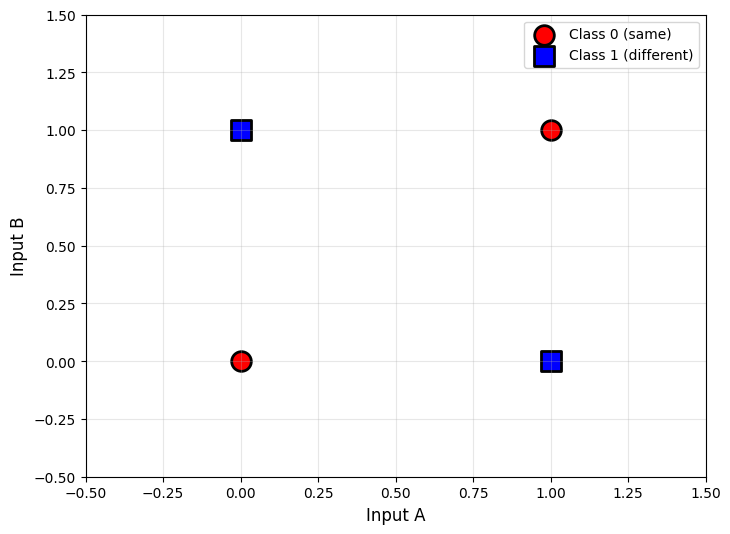


❌ A single straight line CANNOT separate these classes.
✅ This is why we need hidden layers — they create non-linear boundaries.


In [4]:
plt.figure(figsize=(8, 6))

for i in range(len(X)):
    color = 'red' if y[i][0] == 0 else 'blue'
    marker = 'o' if y[i][0] == 0 else 's'
    plt.scatter(X[i][0], X[i][1], c=color, s=200, marker=marker,
                edgecolors='black', linewidths=2)

plt.xlabel('Input A', fontsize=12)
plt.ylabel('Input B', fontsize=12)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True, alpha=0.3)
plt.legend(['Class 0 (same)', 'Class 1 (different)'], loc='upper right')
plt.show()

print("\n❌ A single straight line CANNOT separate these classes.")
print("✅ This is why we need hidden layers — they create non-linear boundaries.")

### Neural Network
```
Input Layer (2 neurons) → Hidden Layer (4 neurons) → Output Layer (1 neuron)
```
- input: 2 values (xor inputs)
- hidden: 4 neurons
- output: 1 nueron w/ sigmoid activation

In [5]:
# Network architecture
INPUT_SIZE = 2
HIDDEN_SIZE = 4
OUTPUT_SIZE = 1

In [6]:
# Weights from input to hidden layer (2 inputs → 4 hidden neurons)
weights_input_hidden = np.random.randn(INPUT_SIZE, HIDDEN_SIZE) * 0.5
bias_hidden = np.zeros((1, HIDDEN_SIZE))

print(weights_input_hidden)
print(bias_hidden)

[[-0.2152003  -0.93295861  0.2628252   0.5433919 ]
 [-0.39885904  0.24339206  0.73313589  0.25644791]]
[[0. 0. 0. 0.]]


In [7]:
# Weights from hidden to output layer (4 hidden neurons → 1 output)
weights_hidden_output = np.random.randn(HIDDEN_SIZE, OUTPUT_SIZE) * 0.5
bias_output = np.zeros((1, OUTPUT_SIZE))

print(weights_hidden_output)
print(bias_output)

[[ 0.24397631]
 [ 0.26995084]
 [-0.53403467]
 [-0.08461189]]
[[0.]]


In [8]:
print("Network initialized with random weights:")
print(f"  Input → Hidden weights shape: {weights_input_hidden.shape}")
print(f"  Hidden → Output weights shape: {weights_hidden_output.shape}")
print(f"\nTotal parameters: {weights_input_hidden.size + bias_hidden.size + weights_hidden_output.size + bias_output.size}")

# 8 weight + 4 bias | 4 weight + 1 bias | ==> 17 parameters

Network initialized with random weights:
  Input → Hidden weights shape: (2, 4)
  Hidden → Output weights shape: (4, 1)

Total parameters: 17


- sigmoid turn num into range (0,1)
- Large positive numbers → close to 1
- Large negative numbers → close to 0
- Zero → exactly 0.5

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of sigmoid: σ(x) * (1 - σ(x))"""
    s = sigmoid(x)
    return s * (1 - s)

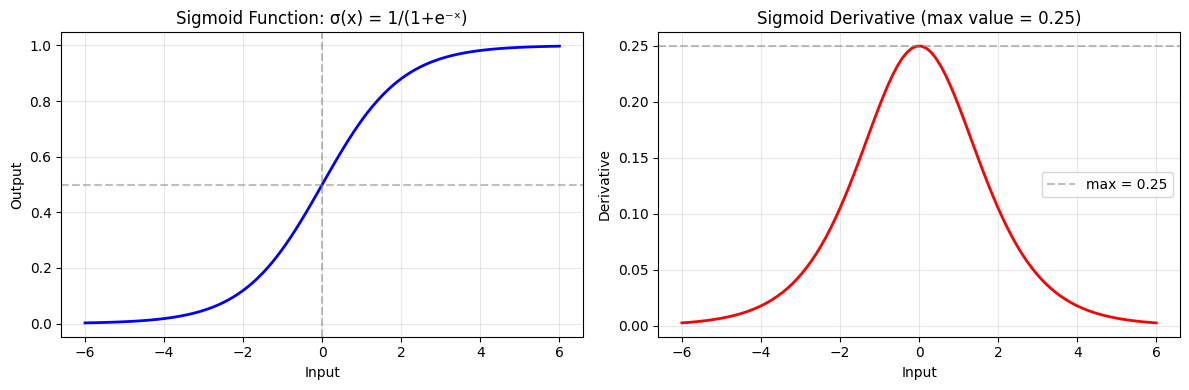

In [10]:
# Visualize sigmoid
x_range = np.linspace(-6, 6, 100)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_range, sigmoid(x_range), 'b-', linewidth=2)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Sigmoid Function: σ(x) = 1/(1+e⁻ˣ)')
plt.grid(True, alpha=0.3)


plt.subplot(1, 2, 2)
plt.plot(x_range, sigmoid_derivative(x_range), 'r-', linewidth=2)
plt.axhline(y=0.25, color='gray', linestyle='--', alpha=0.5, label='max = 0.25')
plt.xlabel('Input')
plt.ylabel('Derivative')
plt.title('Sigmoid Derivative (max value = 0.25)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
print("\nThe maximum derivative is only 0.25!")
print("This is the vanishing gradient problem.")
print("10 layers: 0.25^10 = ", 0.25**10)


The maximum derivative is only 0.25!
This is the vanishing gradient problem.
10 layers: 0.25^10 =  9.5367431640625e-07


### Forward Pass

1. **Input → Hidden:** Multiply inputs by weights, add bias, apply activation
2. **Hidden → Output:** Multiply hidden by weights, add bias, apply activation


In [12]:
def forward(X):
    """
    Forward pass through the network.
    Returns all intermediate values (we need them for backprop).
    """
    # Step 1: Input to Hidden
    # z_hidden = X @ W + b (linear combination)
    z_hidden = np.dot(X, weights_input_hidden) + bias_hidden

    # a_hidden = sigmoid(z_hidden) (activation)
    a_hidden = sigmoid(z_hidden)

    # Step 2: Hidden to Output
    # z_output = a_hidden @ W + b
    z_output = np.dot(a_hidden, weights_hidden_output) + bias_output

    # a_output = sigmoid(z_output)
    a_output = sigmoid(z_output)

    # Return everything (we need z values for backprop)
    return z_hidden, a_hidden, z_output, a_output

In [13]:
# Test forward pass with untrained network
z_h, a_h, z_o, predictions = forward(X)

In [14]:
print("Forward pass with UNTRAINED network:")
print("-" * 50)
for i in range(len(X)):
    print(f"Input: {X[i]} → Prediction: {predictions[i][0]:.4f} (Target: {y[i][0]})")

print("\n❌ Predictions are garbage — the network hasn't learned anything yet.")

Forward pass with UNTRAINED network:
--------------------------------------------------
Input: [0 0] → Prediction: 0.4869 (Target: 0)
Input: [0 1] → Prediction: 0.4603 (Target: 1)
Input: [1 0] → Prediction: 0.4575 (Target: 1)
Input: [1 1] → Prediction: 0.4323 (Target: 0)

❌ Predictions are garbage — the network hasn't learned anything yet.


- Loss Function: Mean Squared Error
- MSE = mean((prediction - target)²)

In [15]:
def compute_loss(y_true, y_pred):
    """Mean Squared Error"""
    return np.mean((y_true - y_pred) ** 2)

In [16]:
# Calculate initial loss
initial_loss = compute_loss(y, predictions)
print(f"Initial Loss (untrained): {initial_loss:.4f}")
print("\nThis number should decrease as we train.")

Initial Loss (untrained): 0.2524

This number should decrease as we train.


### Backpropagation

1. Calculate error at output
2. Figure out how much each output weight contributed
3. Propagate error back to hidden layer
4. Figure out how much each hidden weight contributed
5. Adjust all weights proportionally

In [17]:
def backward(X, y, z_hidden, a_hidden, z_output, a_output, learning_rate):
    """
    Backpropagation: compute gradients and update weights.
    """
    global weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

    m = X.shape[0]  # Number of training examples

    # ============ OUTPUT LAYER ============
    # Error at output: difference between prediction and target
    output_error = a_output - y  # Shape: (4, 1)

    # Gradient of loss w.r.t. z_output (before activation)
    # This combines the error with the sigmoid derivative
    output_delta = output_error * sigmoid_derivative(z_output)  # Shape: (4, 1)

    # Gradient of loss w.r.t. weights_hidden_output
    # How much did each weight contribute to the error?
    grad_weights_hidden_output = np.dot(a_hidden.T, output_delta) / m
    grad_bias_output = np.mean(output_delta, axis=0, keepdims=True)

    # ============ HIDDEN LAYER ============
    # Propagate error back to hidden layer
    hidden_error = np.dot(output_delta, weights_hidden_output.T)

    # Gradient of loss w.r.t. z_hidden
    hidden_delta = hidden_error * sigmoid_derivative(z_hidden)

    # Gradient of loss w.r.t. weights_input_hidden
    grad_weights_input_hidden = np.dot(X.T, hidden_delta) / m
    grad_bias_hidden = np.mean(hidden_delta, axis=0, keepdims=True)

    # ============ UPDATE WEIGHTS ============
    # Move weights in the opposite direction of the gradient
    # (gradient points uphill, we want to go downhill)
    weights_hidden_output -= learning_rate * grad_weights_hidden_output
    bias_output -= learning_rate * grad_bias_output
    weights_input_hidden -= learning_rate * grad_weights_input_hidden
    bias_hidden -= learning_rate * grad_bias_hidden

print("Backpropagation function defined.")
print("This is the 'learning' part — adjusting weights to reduce error.")

Backpropagation function defined.
This is the 'learning' part — adjusting weights to reduce error.


### Training Loop
```
for each iteration:
    1. Forward pass → get predictions
    2. Calculate loss → how wrong are we?
    3. Backward pass → compute gradients, update weights
```

In [18]:
# Reset weights (in case you run this cell multiple times)
np.random.seed(42)
weights_input_hidden = np.random.randn(INPUT_SIZE, HIDDEN_SIZE) * 0.5
bias_hidden = np.zeros((1, HIDDEN_SIZE))
weights_hidden_output = np.random.randn(HIDDEN_SIZE, OUTPUT_SIZE) * 0.5
bias_output = np.zeros((1, OUTPUT_SIZE))

In [19]:
# Hyperparameters
learning_rate = 2.0  # How big our steps are
iterations = 10000   # How many times to loop

In [20]:
# Track loss over time
loss_history = []

In [21]:
print("Training started...")
print("-" * 50)

for i in range(iterations):
    # Forward pass
    z_h, a_h, z_o, predictions = forward(X)

    # Calculate loss
    loss = compute_loss(y, predictions)
    loss_history.append(loss)

    # Backward pass (updates weights internally)
    backward(X, y, z_h, a_h, z_o, predictions, learning_rate)

    # Print progress
    if i % 1000 == 0:
        print(f"Iteration {i:5d} | Loss: {loss:.6f}")


Training started...
--------------------------------------------------
Iteration     0 | Loss: 0.255675
Iteration  1000 | Loss: 0.203313
Iteration  2000 | Loss: 0.005210
Iteration  3000 | Loss: 0.001743
Iteration  4000 | Loss: 0.001005
Iteration  5000 | Loss: 0.000696
Iteration  6000 | Loss: 0.000529
Iteration  7000 | Loss: 0.000425
Iteration  8000 | Loss: 0.000355
Iteration  9000 | Loss: 0.000304


In [22]:
# Final predictions
_, _, _, final_predictions = forward(X)

print("Final Results After Training:")
print("-" * 50)
print(f"{'Input':<12} {'Target':<10} {'Prediction':<12} {'Rounded':<10}")
print("-" * 50)

for i in range(len(X)):
    pred = final_predictions[i][0]
    rounded = round(pred)
    status = "✅" if rounded == y[i][0] else "❌"
    print(f"{str(X[i]):<12} {y[i][0]:<10} {pred:<12.4f} {rounded:<10} {status}")

print("-" * 50)
print(f"\n🎉 The network learned XOR from random weights!")

Final Results After Training:
--------------------------------------------------
Input        Target     Prediction   Rounded   
--------------------------------------------------
[0 0]        0          0.0187       0          ✅
[0 1]        1          0.9845       1          ✅
[1 0]        1          0.9844       1          ✅
[1 1]        0          0.0151       0          ✅
--------------------------------------------------

🎉 The network learned XOR from random weights!


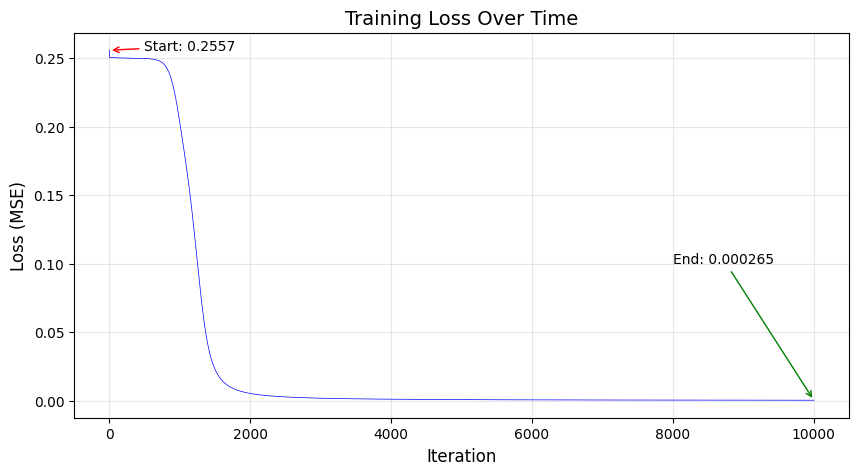

The loss started high (random guessing) and decreased (learning).


In [23]:
# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(loss_history, 'b-', linewidth=0.5)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Training Loss Over Time', fontsize=14)
plt.grid(True, alpha=0.3)

# Add annotations
plt.annotate(f'Start: {loss_history[0]:.4f}',
             xy=(0, loss_history[0]), fontsize=10,
             xytext=(500, loss_history[0]),
             arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate(f'End: {loss_history[-1]:.6f}',
             xy=(len(loss_history)-1, loss_history[-1]), fontsize=10,
             xytext=(len(loss_history)-2000, 0.1),
             arrowprops=dict(arrowstyle='->', color='green'))

plt.show()

print("The loss started high (random guessing) and decreased (learning).")

- Learning Rate Too High

1.   List item
2.   List item



In [26]:
# Reset and train with learning rate = 100 (way too high)
np.random.seed(42)
weights_input_hidden = np.random.randn(INPUT_SIZE, HIDDEN_SIZE) * 0.5
bias_hidden = np.zeros((1, HIDDEN_SIZE))
weights_hidden_output = np.random.randn(HIDDEN_SIZE, OUTPUT_SIZE) * 0.5
bias_output = np.zeros((1, OUTPUT_SIZE))

lr_high = 100.0
loss_high_lr = []

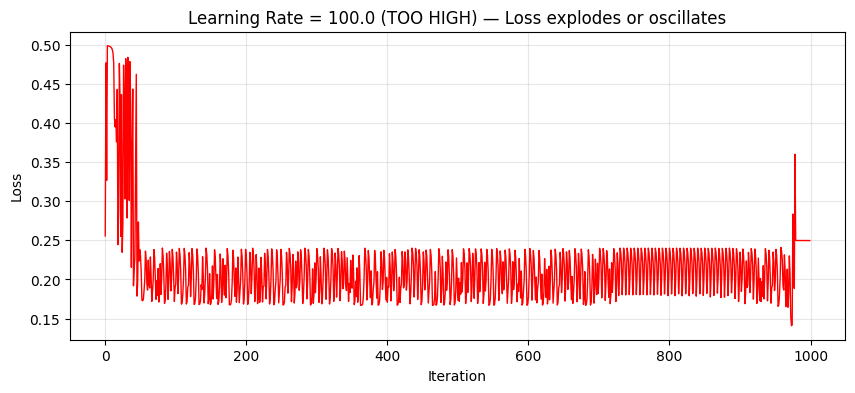

In [27]:
for i in range(1000):
    z_h, a_h, z_o, pred = forward(X)
    loss_high_lr.append(compute_loss(y, pred))
    backward(X, y, z_h, a_h, z_o, pred, lr_high)

plt.figure(figsize=(10, 4))
plt.plot(loss_high_lr, 'r-', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title(f'Learning Rate = {lr_high} (TOO HIGH) — Loss explodes or oscillates')
plt.grid(True, alpha=0.3)
plt.show()

- Learning Rate Too Low


In [28]:
# Reset and train with learning rate = 0.001 (too low)
np.random.seed(42)
weights_input_hidden = np.random.randn(INPUT_SIZE, HIDDEN_SIZE) * 0.5
bias_hidden = np.zeros((1, HIDDEN_SIZE))
weights_hidden_output = np.random.randn(HIDDEN_SIZE, OUTPUT_SIZE) * 0.5
bias_output = np.zeros((1, OUTPUT_SIZE))

lr_low = 0.001
loss_low_lr = []

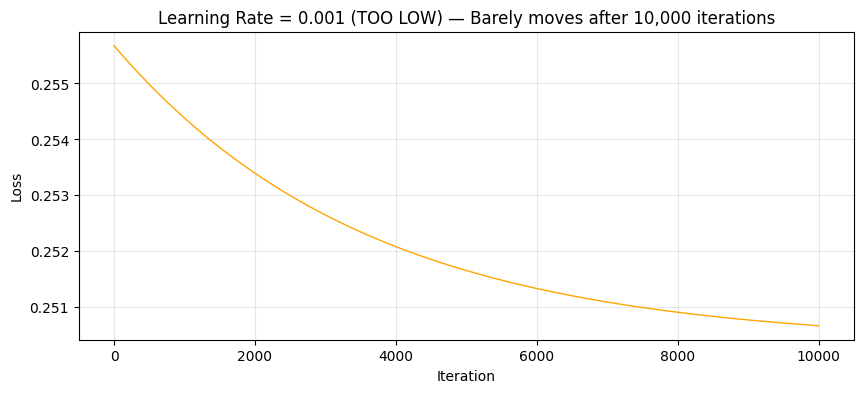

Predictions with low learning rate:
  [0 0] → 0.4977 (target: 0)
  [0 1] → 0.4852 (target: 1)
  [1 0] → 0.4828 (target: 1)
  [1 1] → 0.4716 (target: 0)

❌ With learning rate too low, learning is painfully slow.


In [29]:
for i in range(10000):
    z_h, a_h, z_o, pred = forward(X)
    loss_low_lr.append(compute_loss(y, pred))
    backward(X, y, z_h, a_h, z_o, pred, lr_low)

plt.figure(figsize=(10, 4))
plt.plot(loss_low_lr, 'orange', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title(f'Learning Rate = {lr_low} (TOO LOW) — Barely moves after 10,000 iterations')
plt.grid(True, alpha=0.3)
plt.show()

final_pred_low = forward(X)[3]
print("Predictions with low learning rate:")
for i in range(len(X)):
    print(f"  {X[i]} → {final_pred_low[i][0]:.4f} (target: {y[i][0]})")
print("\n❌ With learning rate too low, learning is painfully slow.")

- Not Enough Hidden Neurons

In [30]:
# Try with only 2 hidden neurons
np.random.seed(42)
w_ih_small = np.random.randn(2, 2) * 0.5  # Only 2 hidden neurons
b_h_small = np.zeros((1, 2))
w_ho_small = np.random.randn(2, 1) * 0.5
b_o_small = np.zeros((1, 1))

In [31]:
def forward_small(X):
    z_h = np.dot(X, w_ih_small) + b_h_small
    a_h = sigmoid(z_h)
    z_o = np.dot(a_h, w_ho_small) + b_o_small
    a_o = sigmoid(z_o)
    return z_h, a_h, z_o, a_o

In [32]:
def backward_small(X, y, z_h, a_h, z_o, a_o, lr):
    global w_ih_small, b_h_small, w_ho_small, b_o_small
    m = X.shape[0]

    output_delta = (a_o - y) * sigmoid_derivative(z_o)
    w_ho_small -= lr * np.dot(a_h.T, output_delta) / m
    b_o_small -= lr * np.mean(output_delta, axis=0, keepdims=True)

    hidden_delta = np.dot(output_delta, w_ho_small.T) * sigmoid_derivative(z_h)
    w_ih_small -= lr * np.dot(X.T, hidden_delta) / m
    b_h_small -= lr * np.mean(hidden_delta, axis=0, keepdims=True)

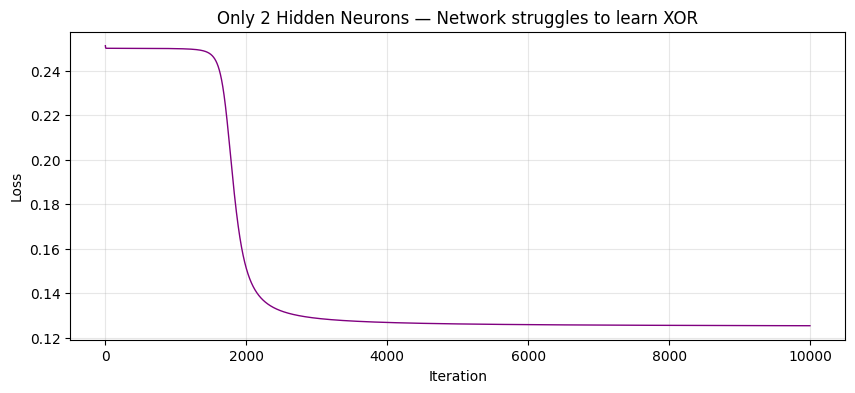

Predictions with only 2 hidden neurons:
  [0 0] → 0.0185 (target: 0)
  [0 1] → 0.4993 (target: 1)
  [1 0] → 0.9832 (target: 1)
  [1 1] → 0.5005 (target: 0)

⚠️  With fewer neurons, the network may not have enough capacity.


In [33]:
loss_small = []
for i in range(10000):
    z_h, a_h, z_o, pred = forward_small(X)
    loss_small.append(compute_loss(y, pred))
    backward_small(X, y, z_h, a_h, z_o, pred, 2.0)

plt.figure(figsize=(10, 4))
plt.plot(loss_small, 'purple', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Only 2 Hidden Neurons — Network struggles to learn XOR')
plt.grid(True, alpha=0.3)
plt.show()

final_small = forward_small(X)[3]
print("Predictions with only 2 hidden neurons:")
for i in range(len(X)):
    print(f"  {X[i]} → {final_small[i][0]:.4f} (target: {y[i][0]})")
print("\n⚠️  With fewer neurons, the network may not have enough capacity.")

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Define the network
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 4)   # 2 inputs → 4 hidden
        self.output = nn.Linear(4, 1)   # 4 hidden → 1 output
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Create network
torch.manual_seed(42)
model = XORNet()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=2.0)

# Training loop
pytorch_loss_history = []

print("Training PyTorch model...")
print("-" * 50)

for i in range(10000):
    # Forward pass
    predictions = model(X_tensor)
    loss = criterion(predictions, y_tensor)
    pytorch_loss_history.append(loss.item())

    # Backward pass (automatic!)
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Compute gradients (THIS IS BACKPROP!)
    optimizer.step()       # Update weights

    if i % 2000 == 0:
        print(f"Iteration {i:5d} | Loss: {loss.item():.6f}")

print("-" * 50)
print(f"Iteration {10000:5d} | Loss: {pytorch_loss_history[-1]:.6f}")

Training PyTorch model...
--------------------------------------------------
Iteration     0 | Loss: 0.286560
Iteration  2000 | Loss: 0.000779
Iteration  4000 | Loss: 0.000298
Iteration  6000 | Loss: 0.000179
Iteration  8000 | Loss: 0.000127
--------------------------------------------------
Iteration 10000 | Loss: 0.000098


In [35]:
# Compare results
print("\nPyTorch Final Predictions:")
print("-" * 50)
with torch.no_grad():
    final_preds = model(X_tensor)
    for i in range(len(X)):
        pred = final_preds[i].item()
        print(f"Input: {X[i]} → Prediction: {pred:.4f} (Target: {y[i][0]})")


PyTorch Final Predictions:
--------------------------------------------------
Input: [0 0] → Prediction: 0.0091 (Target: 0)
Input: [0 1] → Prediction: 0.9890 (Target: 1)
Input: [1 0] → Prediction: 0.9913 (Target: 1)
Input: [1 1] → Prediction: 0.0105 (Target: 0)


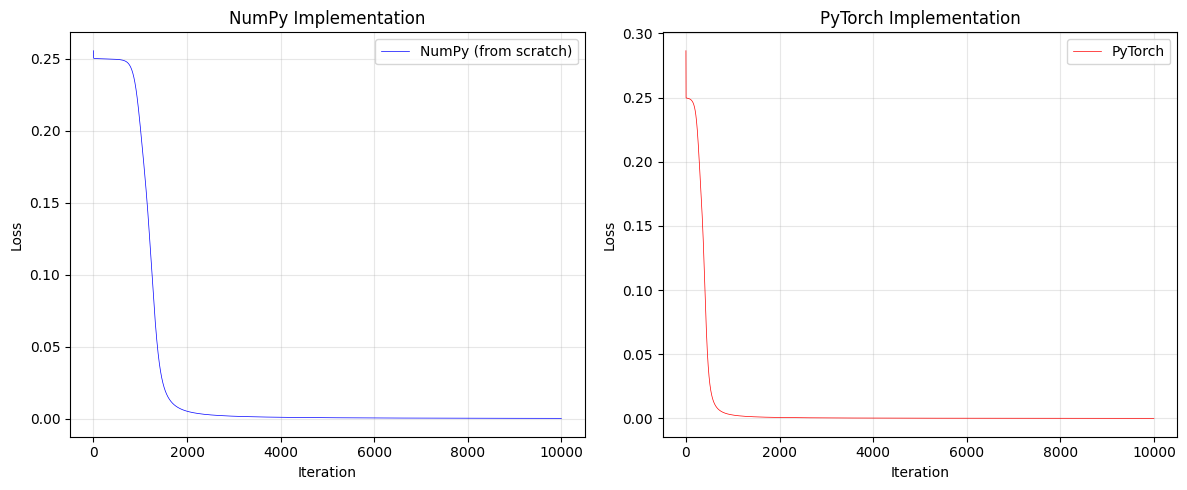


✅ Both implementations achieve the same result!
   PyTorch just automates the gradient calculations.


In [36]:
# Compare loss curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history, 'b-', linewidth=0.5, label='NumPy (from scratch)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('NumPy Implementation')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pytorch_loss_history, 'r-', linewidth=0.5, label='PyTorch')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PyTorch Implementation')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("\n✅ Both implementations achieve the same result!")
print("   PyTorch just automates the gradient calculations.")